<a href="https://colab.research.google.com/github/arezyapova/projects/blob/main/test_Rezyapova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Тестовое задание

## 1. SQL

### Задание 1

По итогам ЧМ-2018 по футболу появилась статистика по командам и отдельным игрокам. Данные лежат в MySQL.

Команды - таблица **teams**:

- **id** int (уникальный идентификатор команды)
- **name** varchar(32) (название команды)
- **games_played** smallint (сыграно матчей на турнире)
- **goals** smallint (забито голов)
- **goals_minus** smallint (пропущено голов)
- **yellow_cards** smallint (желтые карточки)
- **red_cards** smallint (красные карточки)

Игроки - табличка **players_stat**:

- **id** int (уникальный идентификатор игрока)
- **name** varchar(32) (имя игрока)
- **team_id** int (id команды, за которую выступает игрок)
- **position** varchar(8) (позиция игрока; возможные значения – ‘GK’, ‘DF’, ‘MD’, ‘AT’)
- **age** smallint (возраст игрока)
- **min_played** int (сыграно минут на турнире)
- **goals** smallint (забито голов)
- **yellow_cards** smallint (жёлтые карточки)
- **red_cards** smallint (красные карточки)

1. В каких командах есть вратари (‘GK’), получавшие карточки на турнире?

In [ ]:
'''
SELECT l.name AS name
FROM teams AS l
JOIN
    players_stat AS r
ON 
    l.id = r.team_id
WHERE 
    r.position = 'GK' 
    AND
    (r.yellow_cards <>0 OR r.red_cards <>0)
'''

2. Каков 90-ый перцентиль возраста игроков, сыгравших на турнире не менее 270 минут?

In [ ]:
'''
SELECT name
FROM (
    SELECT 
        name,
        min_played,
        COUNT(1) OVER (PARTITION BY NULL) As N, 
        ROW_NUMBER() OVER (ORDER BY age) AS i
    FROM players_stat) t
WHERE
    i = ROUND(N * 90.00 / 100.00, 0, 0)
    AND
    min_played >= 270
'''

'\nSELECT name\nFROM (\n    SELECT \n        name,\n        min_played,\n        COUNT(1) OVER (PARTITION BY NULL) As N, \n        ROW_NUMBER() OVER (ORDER BY age) AS i\n    FROM players_stat) t\nWHERE\n    i = ROUND(N * 90.00 / 100.00, 0, 0)\n    AND\n    min_played >= 270\n'

3. В каких командах голы на турнире забивали только нападающие ('AT')?

In [ ]:
'''
SELECT l.name AS name
FROM teams as l
JOIN players_stat AS r
ON l.id = r.team_id
WHERE 
    (r.position = 'AT' AND r.goals > 0) AND
    (r.position = 'MD' AND r.goals = 0) AND
    (r.position = 'GK' AND r.goals = 0) AND
    (r.position = 'DF' AND r.goals = 0)
'''

4. Представители какой команды чаще других получали желтые карточки во время игр?

In [ ]:
'''
SELECT name
FROM teams
ORDER BY yellow_cards DESC
LIMIT 1
'''

## 2. Python

### Задание 2

Для выполнения задания нужно загрузить датасет ниже на локальный компьютер.

[https://www.kaggle.com/fernandol/countries-of-the-world](https://www.kaggle.com/fernandol/countries-of-the-world)

Далее, преобразовать его в датафрейм Pandas и выполнить следующие действия:
1. Посчитать медианное значение площади стран Океании.
2. Определить 10 стран с наименьшим уровнем грамотности.
3. Построить график суммарной численности населения в разбивке по регионам.
4. На основании данных, ответить на вопрос, в каком регионе наблюдается наибольший миграционный отток населения.

In [ ]:
# Импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [ ]:
# Загружаем и преобразовываем необходимые данные
df = pd.read_csv('archive.zip', decimal = ',')
df.Region = df.Region.str.rstrip()

1. Посчитать медианное значение площади стран Океании.

In [ ]:
df.query('Region=="OCEANIA"')['Pop. Density (per sq. mi.)'].median()

60.1

2. Определить 10 стран с наименьшим уровнем грамотности

In [ ]:
df.sort_values('Literacy (%)')\
.Country\
.head(10)

151           Niger 
31     Burkina Faso 
183    Sierra Leone 
86           Guinea 
0       Afghanistan 
188         Somalia 
73      Gambia, The 
180         Senegal 
97             Iraq 
21            Benin 
Name: Country, dtype: object

3. Построить график суммарной численности населения в разбивке по регионам

Text(0, 0.5, 'Region')

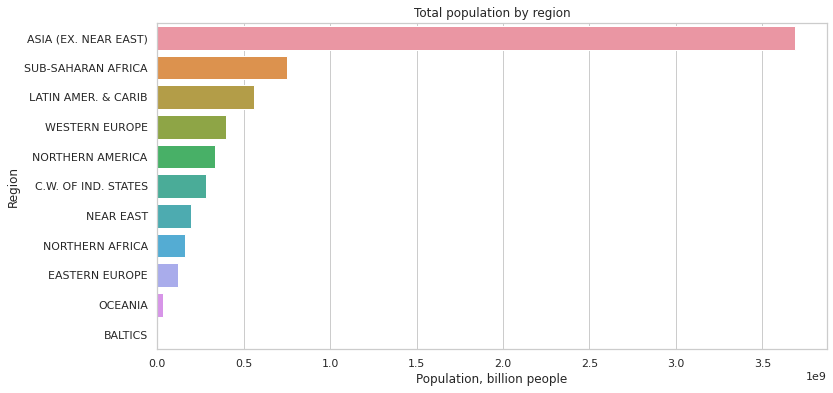

In [ ]:
viz_table = df.groupby('Region', as_index = False)\
            .agg({'Population':'sum'})\
            .sort_values('Population', ascending = False)

ax = sns.barplot(x = 'Population', y = 'Region', data = viz_table, capsize = .2, orient = 'h')
plt.title('Total population by region')
plt.xlabel('Population, billion people')
plt.ylabel('Region')

4. На основании данных, ответить на вопрос, в каком регионе наблюдается наибольший миграционный отток населения.

In [ ]:
df['Net_migration_pop'] = df['Net migration'].mul(df.Population)/100
df.groupby('Region', as_index = False)\
.agg({'Net_migration_pop':'sum'})\
.sort_values('Net_migration_pop')\
.head(1)\
.Region

4    LATIN AMER. & CARIB
Name: Region, dtype: object

Стоит отметить, что на основе предоставленных данных можно сказать только о т.н. чистом миграционном отттоке, т.е в странах региона Латинской Америки и Карибского бассейна наибольшая разница между числом эмигрантов и иммигрантов. Причем, в данном случае мигрант - это проживающий в другой стране, т.е. здесь речь идет не о потоках, а об иностранном населении.